# Curso de Optimización I (DEMAT/CIMAT)
# Tarea 1

| Descripción:                         | Fechas                  |
|--------------------------------------|-------------------------|
| Fecha de publicación del documento:  | **Enero  25, 2024**    |
| Fecha límite de entrega de la tarea: | **Febrero 4, 2024**    |

## Indicaciones

Puede escribir el código de los algoritmos que se piden en una
celda de este notebook o si lo prefiere, escribir las funciones
en un archivo `.py` independiente e importar la funciones para
usarlas en este notebook. Lo importante es que en el notebook
aparezcan los resultados de la pruebas realizadas y que:

- Si se requieren otros archivos para poder reproducir los resultados,
  para mandar la tarea cree un archivo ZIP en el que incluya
  el notebook y los archivos adicionales.
- Si todos los códigos para que se requieren para reproducir los
  resultados están en el notebook, no hace falta comprimir el notebook
  y puede anexar este archivo en la tarea del Classroom.
- Exportar el notebook a un archivo PDF y anexarlo en la tarea del
  Classroom como un archivo independiente.
  **No incluya el PDF dentro del ZIP**, porque la idea que lo pueda accesar
  directamente para poner anotaciones y la calificación de cada ejercicio.

En la descripción de los ejercicios se nombran algunas variables
para el algoritmo, pero sólo es para facilitar la descripción.
En la implementación pueden nombrar sus variables como gusten.

En los algoritmos se describen las entradas de las
funciones. La intención es que tomen en cuenta lo que requiere
el algoritmo y que tiene que haber parámetros que permitan
controlar el comportamiento del algoritmo,
evitando que dejen fijo un valor y que no se puede modificar
para hacer diferentes pruebas. Si quieren dar esta información
usando un tipo de dato que contenga todos los valores o
usar variables por separado, etc., lo pueden hacer y no usen
variables globales si no es necesario.

Lo mismo para los valores que devuelve una función.
Pueden codificar como gusten la manera en que regresa los cálculos.
El punto es que podamos tener acceso a los resultados para poder usarlos,
y por eso no es conveniente que la función sólo imprima los valores
sin devolverlos.

Para los ejercicios teóricos puede escribir en la celda la solución, o
si escribio la solución en una hoja, puede insertar una(s) foto(s) en la que
se vea clara la solución. Si le es más facíl insertar la imagen en un procesador
de texto como Word, lo puede utilizar y exportar el documento a PDF y subir
el archivo. No lo compacte para que se pueda escribir anotaciones en el PDF.

----

## Ejercicio 1 (3.5 puntos)

1. Programar el método de la sección dorada descrito en la diapositiva 9 de la Clase 3.
   La función que implementa el método recibe como argumentos la función que se va
   a optimizar, los límites $x_l$ y $x_u$ del intervalo de búsqueda, la tolerancia
   $\tau>0$, y el número máximo de iteraciones $N$.
   
   La función debe devolver el punto $x_k, f(x_k)$, los extremos del último intervalo de búsqueda
   $[x_l, x_u]$, el número de iteraciones $k$ realizadas y la variable booleana $bres$
   que indica si el algoritmo terminó porque se cumplió el criterio de paso o no.
   
2. Probar el método con las funciones que se describen en las siguientes
   celdas.
- Use el intervalo que se especifica en cada caso y $N=50$.
- Use como tolerancie $\tau = \epsilon_m^{1/3}$, donde $\epsilon_m$ es el épsilon de la máquina.
- Imprima $k, x_k, f_k, x_u-x_l$ y $bres$.

### Solución:

In [1]:
# importamos librerías
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Código de la función

def golden_section(x_l, x_u, tol_1, tol_2, maxIter, f):
  #definimos el número áureo
  rho=(np.sqrt(5)-1)/2
  #comenzamos con las iteraciones
  for i in range(maxIter):
    b=rho*(x_u-x_l)
    x_1=x_u-b
    x_3=x_l+b
    #actualizamos los valores de x_u y x_l
    if f(x_1)<f(x_3):
      x_u=x_3
      x_k=x_1
    elif f(x_1)>f(x_3):
      x_l=x_1
      x_k=x_3
    #añadimos esta condición en caso de que el método no tenga donde moverse
    elif f(x_1)==f(x_3) and i==0:
      print("El método no funciona con estos parámetros")
      return np.array(["¿?", x_l, x_u, i, True])
    #verificamos tolerancias
    if x_u-x_l<tol_1 or np.abs(f(x_1)-f(x_3))<tol_2:
      return np.array([x_k, x_l, x_u, i+1, f(x_k), True])
  return np.array([x_k, x_l, x_u, f(x_k), False])


In [3]:
#calculamos el epsilon de la máquina
eps_machine=1
while 1+eps_machine != 1:
  eps_machine/=2
print(eps_machine)

1.1102230246251565e-16


In [4]:
#creamos una función para imprimir los resultados

def print_results(y):
  if y[-1]==True:
    print("El programa terminó con {} iteraciones.".format(y[3]))
    print("El valor alcanzado es {} y el intervalo final es [{},{}]".format(y[0], y[1], y[2]))
    print("f(x_k)={}".format(y[4]))
  else:
    print("El programa alcanzó el máximo de iteraciones.")
    print("El valor alcanzado es {} y el intervalo final es [{},{}]".format(y[0], y[1], y[2]))
    print("f(x_k)={}".format(y[4]))

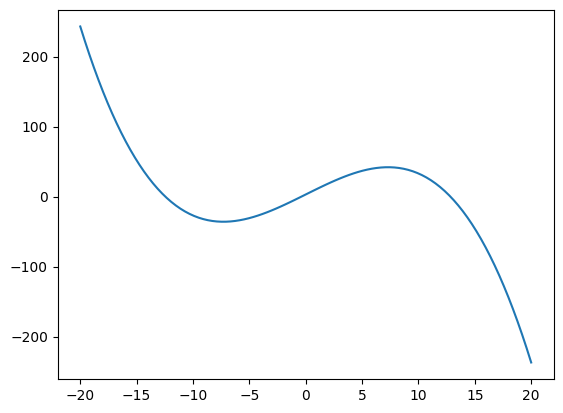

In [5]:
# Función objetivo 1
def fnc1(x):
    return -0.05*x**3 + 8*x + 3

xl = -20
xu =  20
xx = np.linspace(xl, xu, 100)
plt.plot(xx, fnc1(xx))

In [6]:
# Prueba del algoritmo

sol1=golden_section(-20, 20, eps_machine**(1/3), eps_machine**(1/3), 50, fnc1)
print_results(sol1)


El programa terminó con 17.0 iteraciones.
El valor alcanzado es -7.305033397695072 y el intervalo final es [-7.311956208563562,-7.300754865280659]
f(x_k)=-35.94915496878281


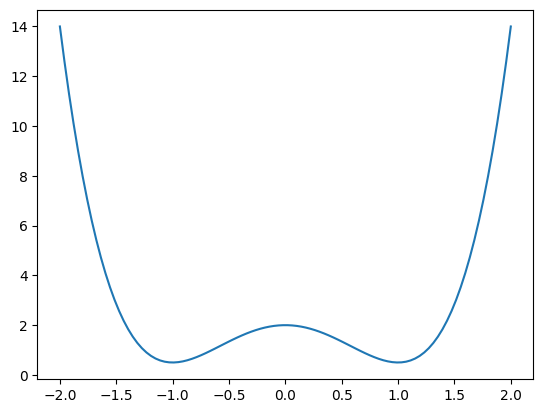

In [7]:
# Función objetivo 2
def fnc2(x):
    return 1.5*x**4 - 3*x**2 + 2

xl = -2
xu =  2
xx = np.linspace(xl, xu, 100)
plt.plot(xx, fnc2(xx))

In [8]:
# Prueba del algoritmo

sol2=golden_section(-2, 2, eps_machine**(1/3), eps_machine**(1/3), 50, fnc2)
print_results(sol2)


El método no funciona con estos parámetros
El programa alcanzó el máximo de iteraciones.
El valor alcanzado es ¿? y el intervalo final es [-2,2]
f(x_k)=True


El método no funciona en este caso ya que la función es par y en la primer prueba se cumple que $f(x_1)=f(x_3)$ por lo que el algoritmo no puede continuar calculando.

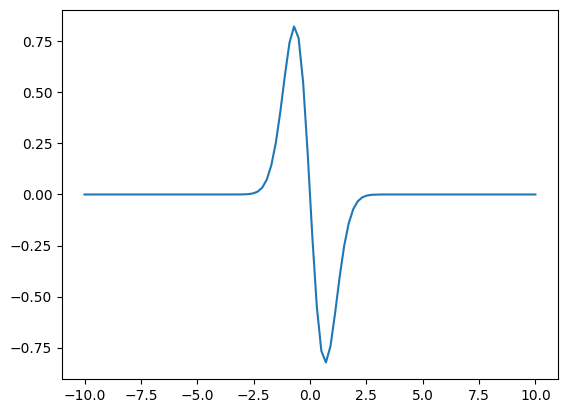

In [9]:
# Función objetivo 3
def fnc3(x):
    return -(x + np.sin(x))*np.exp(-x**2)

xl = -10
xu =  10
xx = np.linspace(xl, xu, 100)
plt.plot(xx, fnc3(xx))

In [10]:
# Prueba del algoritmo

sol3=golden_section(-10, 10, eps_machine**(1/3), eps_machine**(1/3), 50, fnc3)
print_results(sol3)


El programa terminó con 16.0 iteraciones.
El valor alcanzado es 0.6780442951798414 y el intervalo final es [0.6724436235383898,0.6815057006140863]
f(x_k)=-0.8242351963221183


_

```







```

---

## Ejercicio 2 (3 puntos)

La función de Griewangk en $\mathbb{R}^2$ se define como

$$ f(\mathbf{x}) = f(x_1,x_2) = \frac{x^2_1 + x^2_2}{4000} - \cos(x_1)\cos\left(\frac{x_2}{\sqrt{2}}\right) + 1 $$

Dado el punto $\mathbf{x}_k$ y la dirección $\mathbf{d}_k$, definimos la función
$g(t; \mathbf{x}_k, \mathbf{d}_k) = f(\mathbf{x}_k + t\mathbf{d}_k)$.

1. Programe las funciones  $f(\mathbf{x})$ y $g(t; \mathbf{x}_k, \mathbf{d}_k)$.
2. Calcule de manera analítica el gradiente de $f(\mathbf{x})$ y programe la función correspondiente.
3. Sean $\mathbf{x}_0 = (3,0.5)$, $\mathbf{d}_0 = \mathbf{p}/\|\mathbf{p}\|$, donde
   $\mathbf{p} = (2,1)$, y $\mathbf{g}_0 = \nabla f(\mathbf{x}_0)/\|\nabla f(\mathbf{x}_0)\|$.
   Calcule el valor de la derivada direccional de $f$ en $\mathbf{x}_0$ en la dirección
   $\mathbf{d}_0$ y en la dirección $-\mathbf{g}_0$. Imprima estos valores.
4. Genere una gráfica que muestre  la gráfica de $g(t; \mathbf{x}_0, \mathbf{d}_0)$ y
   $g(t; \mathbf{x}_0, -\mathbf{g}_0)$ para $t \in [0,2]$.
5. Aplique el método de la sección dorada para minimizar la función $g(t; \mathbf{x}_0, -\mathbf{g}_0)$
   en el intervalo $[0, 2]$. Si $t_0$ es el minimizador y $\mathbf{x}_1 = \mathbf{x}_0 - t_0\mathbf{g}_0$,
   imprima $\mathbf{x}_0$, $f(\mathbf{x}_0)$, $t_0$, $\mathbf{x}_1$, $f(\mathbf{x}_1)$.
6. Repita los puntos 4 y 5 usando el intervalo $[0,8]$.

### Solución.

In [11]:
#definimos la función f
def f(x):
  return (x[0]**2+x[1]**2)/4000 - np.cos(x[0])*np.cos(x[1]/np.sqrt(2))+1

#definimos la función g
def g(t, x, d):
  return f(x+t*d)

# Cálculo del gradiente
Recordemos que $$\nabla f=\begin{pmatrix}
\dfrac{∂ f}{∂ x_1}\\
\dfrac{∂ f}{∂ x_2}
\end{pmatrix}$$
por lo que, el vector gradiente quedaría como sigue:
$$\nabla f=\begin{pmatrix}
\dfrac{x_1}{2000}+\sin(x_1)\cos\left(\dfrac{x_2}{\sqrt{2}}\right)\\
\dfrac{x_2}{2000}+\dfrac{\cos(x_1)\sin\left(\dfrac{x_2}{\sqrt{2}}\right)}{\sqrt{2}}
\end{pmatrix}$$

In [12]:
#programamos la función para el gradiente

def dfdx1(x):
  return (x[0]/2000)+np.sin(x[0])*np.cos(x[1]/np.sqrt(2))

def dfdx2(x):
  return (x[1]/2000)+(np.sin(x[1]/np.sqrt(2))*np.cos(x[0]))/np.sqrt(2)

def grad_f(x):
  return np.array([dfdx1(x), dfdx2(x)])

In [13]:
#definimos lo necesario
x0=np.array([3,0.5])
p=np.array([2,1])
d0=p/np.linalg.norm(p)
gf=grad_f(x0)
g0=gf/np.linalg.norm(gf)

#para la derivada direccional en d0
dir_derivative_f_d0=np.dot(gf, d0)
print("El valor de la derivada direccional en d0 es {}".format(dir_derivative_f_d0))

#para la derivada direccional en -g0
dir_derivative_f_g0=np.dot(gf, -g0)
print("El valor de la derivada direccional en -g0 es {}".format(dir_derivative_f_g0))

El valor de la derivada direccional en d0 es 0.011475034596120023
El valor de la derivada direccional en -g0 es -0.27667848944420204


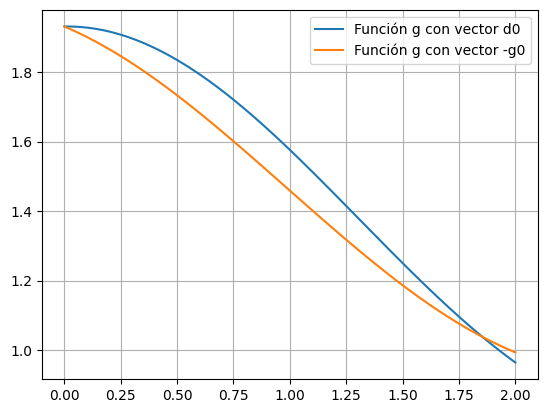

In [14]:
#creamos los vectores con los valores de t y de g con los diferentes vectores
t=np.linspace(0,2,1000)
gtd=np.zeros(1000)
gtg=np.zeros(1000)
for i in range(1000):
  gtd[i]=g(t[i], x0, d0)
  gtg[i]=g(t[i], x0, -g0)

#graficamos
plt.plot(t, gtd, label="Función g con vector d0")
plt.plot(t, gtg, label="Función g con vector -g0")
plt.legend()
plt.grid()
plt.show()

In [15]:
#modificamos un poco la función g para poder usar el método
def g1(t):
  return g(t, x0, -g0)

s1=golden_section(0, 2, eps_machine**(1/3), eps_machine**(1/3), 50, g1)
print_results(s1)
x1=x0-s1[0]*g0

print("x0={}".format(x0))
print("f(x0)={}".format(f(x0)))
print("El minimizador es {}".format(s1[0]))
print("x1={}".format(x1))
print("f(x1)={}".format(f(x1)))

El programa terminó con 23.0 iteraciones.
El valor alcanzado es 1.999980710248643 y el intervalo final es [1.9999687885266701,2.0]
f(x_k)=0.993245384309873
x0=[3.  0.5]
f(x0)=1.9310723123875322
El minimizador es 1.999980710248643
x1=[2.03216033 2.25020262]
f(x1)=0.993245384309873


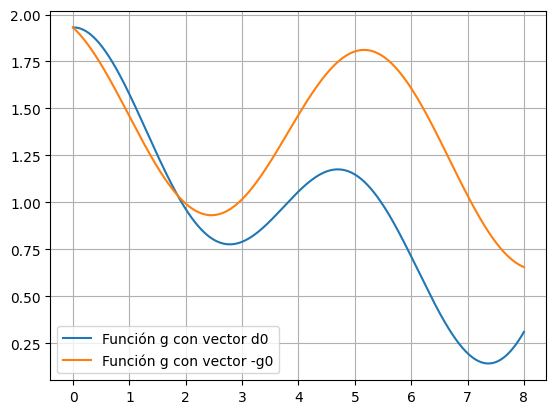

In [16]:
#modificamos los códigos anteriores para el nuevo intervalo

t2=np.linspace(0,8,1000)
gtd2=np.zeros(1000)
gtg2=np.zeros(1000)
for i in range(1000):
  gtd2[i]=g(t2[i], x0, d0)
  gtg2[i]=g(t2[i], x0, -g0)

#graficamos
plt.plot(t2, gtd2, label="Función g con vector d0")
plt.plot(t2, gtg2, label="Función g con vector -g0")
plt.legend()
plt.grid()
plt.show()


In [17]:
s2=golden_section(0, 8, eps_machine**(1/3), eps_machine**(1/3), 50, g1)
print_results(s2)
x1=x0-s2[0]*g0

print("x0={}".format(x0))
print("f(x0)={}".format(f(x0)))
print("El minimizador es {}".format(s2[0]))
print("x1={}".format(x1))
print("f(x1)={}".format(f(x1)))

El programa terminó con 14.0 iteraciones.
El valor alcanzado es 2.4549685097804432 y el intervalo final es [2.449103410293584,2.458593340610722]
f(x_k)=0.9315591745747851
x0=[3.  0.5]
f(x0)=1.9310723123875322
El minimizador es 2.4549685097804432
x1=[1.81198058 2.64836688]
f(x1)=0.9315591745747851


_

```







```

---

## Ejercicio 3 (1.5 puntos)

Sean $\mathbf{a}, \mathbf{b} \in \mathbb{R}^n$. Calcule el gradiente y la Hessiana de la
función  $f(\mathbf{x}) = (\mathbf{a}^\top \mathbf{x})(\mathbf{b}^\top \mathbf{x})$.

### Solución:

Para calcular el gradiente, notemos que \begin{equation*}
\begin{split}
f(\mathbf{x}) &=(\mathbf{a}^t\mathbf{x})(\mathbf{b}^t\mathbf{x})\\
&=(\mathbf{x}^t\mathbf{a})(\mathbf{b}^t\mathbf{x})\\
&=\mathbf{x}^t\mathbf{a}\mathbf{b}^t\mathbf{x}
\end{split}
\end{equation*}
Notemos que $\mathbf{a}\mathbf{b}^t$ es una matriz cuadrada, por lo que $f$ es una forma cuadrática, de esta forma, es inmediato que $$\boxed{\nabla f=(\mathbf{a}\mathbf{b}^t+\mathbf{b}\mathbf{a}^t)\mathbf{x}.}$$
A partir de lo anterior, es posible deducir que $$\dfrac{\partial f}{\partial x_k}=b_k\displaystyle\sum_{i=1}^na_ix_i +a_k\sum_{i=1}^nb_ix_i$$

Con esto, derivando respecto a $x_j$ obtenemos $$\dfrac{\partial ^2f}{\partial x_j\partial x_k}=b_ka_j+a_kb_j$$

Por lo que la matriz Hessiana $H(f)$ estará dada por la suma de dos matrices $A$ y $B$ tales que $$A_{kj}=b_ka_j\quad\text{y}\quad B_{kj}=a_kb_j$$
Es inmediato que $A=\mathbf{b}\mathbf{a}^t$ y $B=\mathbf{a}\mathbf{b}^t$ por lo que $$\boxed{H(f)=\mathbf{a}\mathbf{b}^t+\mathbf{b}\mathbf{a}^t.}$$



_

```







```

---

## Ejercicio 4 (2 puntos)

Tenemos los valores de la derivada direccional $\frac{\partial f}{\partial \mathbf{p}_i}$
de $f$ en el punto $\mathbf{x}_0$ para tres direcciones $\mathbf{p}_i$:

$$ \frac{\partial f}{\partial \mathbf{p}_1}(\mathbf{x}_0) = \frac{3}{\sqrt{2}} \quad \text{para} \quad
\mathbf{p}_1 = \left(0,\frac{1}{\sqrt{2}},\frac{1}{\sqrt{2}} \right)^\top,$$
$$ \frac{\partial f}{\partial \mathbf{p}_2}(\mathbf{x}_0) = \frac{1}{\sqrt{2}} \quad \text{para} \quad
\mathbf{p}_2 = \left(\frac{1}{\sqrt{2}},0,\frac{1}{\sqrt{2}} \right)^\top,$$
$$ \frac{\partial f}{\partial \mathbf{p}_3}(\mathbf{x}_0) = -\frac{1}{\sqrt{2}} \quad \text{para} \quad
\mathbf{p}_3 = \left(\frac{1}{\sqrt{2}},\frac{1}{\sqrt{2}},0 \right)^\top.$$

A partir de esto, calcule el vector gradiente $\nabla f(\mathbf{x}_0)$.

### Solución:

Suponiendo que $f$ es una función continuamente diferenciable con dominio convexo, si $$\nabla f(\mathbf{x}_0)=\begin{pmatrix}
a_1\\
a_2\\
a_3
\end{pmatrix}$$
entonces se debe satisfacer que $$\left\{ \begin{array}{lcc} \mathbf{p}_1^t\nabla f(\mathbf{x}_0)=\dfrac{3}{\sqrt{2}}\\ \mathbf{p}_2^t\nabla f(\mathbf{x}_0)=\dfrac{1}{\sqrt{2}}\\\mathbf{p}_3^t\nabla f(\mathbf{x}_0)=-\dfrac{1}{\sqrt{2}}\end{array}\right.$$
Por lo que nuestro problema se resumen en hallar la solución al sistema de ecuaciones que surge: $$\left\{ \begin{array}{lcc} \dfrac{1}{\sqrt{2}}(a_2+a_3)=\dfrac{3}{\sqrt{2}}\\ \dfrac{1}{\sqrt{2}}(a_1+a_3)=\dfrac{1}{\sqrt{2}}\\\dfrac{1}{\sqrt{2}}(a_1+a_2)=-\dfrac{1}{\sqrt{2}}\end{array}\right. ⇒ \left\{ \begin{array}{lcc} a_2+a_3=3\\ a_1+a_3=1\\ a_1+a_2=-1\end{array}\right.$$

De la primer ecuación obtenemos que $a_2=3-a_3$, sustituyendo esto en la tercer ecuación obtenemos que $a_1=a_3-4$. Sustituyendo en la segunda ecuación del sistema obtenemos que $$a_3=\dfrac{5}{2}$$ y, finalmente, al sustituir este valor en donde corresponda obtenemos $$\nabla f(\mathbf{x}_0)=\begin{pmatrix}
-\dfrac{3}{2}\\
\dfrac{1}{2}\\
\dfrac{5}{2}
\end{pmatrix}.$$








_

```







```

---